# Machine Learning Algorithm for Parkinson Disease

#### Importing libaries

In [5]:
import warnings
warnings.filterwarnings("ignore") #Not to display the warnings

import numpy as np 
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #Modelmetrics

In [8]:
pip install lux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import lux

## Data preprocessing and Exploratory Data Analysis(EDA)

In [10]:
parkinson_data = pd.read_csv('parkinsons.data')
print(parkinson_data)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

**MDVH** denotes Maximum or Minimum Vocal Fundamental Frequency

In [11]:
parkinson_data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
parkinson_data.head(n=20)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
parkinson_data.tail(50)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
parkinson_data.shape
#(rows,columns)

(195, 24)

In [17]:
#Capturing for null values if any of it is available
parkinson_data.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

No null values are present in the data

In [18]:
parkinson_data.describe().round(2).style.background_gradient(cmap='Blues')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.230000,197.100000,116.320000,0.010000,0.000000,0.000000,0.000000,0.010000,0.030000,0.280000,0.020000,0.020000,0.020000,0.050000,0.020000,21.890000,0.750000,0.500000,0.720000,-5.680000,0.230000,2.380000,0.210000
std,41.390000,91.490000,43.520000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.190000,0.010000,0.010000,0.020000,0.030000,0.040000,4.430000,0.430000,0.100000,0.060000,1.090000,0.080000,0.380000,0.090000
min,88.330000,102.140000,65.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.080000,0.000000,0.010000,0.010000,0.010000,0.000000,8.440000,0.000000,0.260000,0.570000,-7.960000,0.010000,1.420000,0.040000
25%,117.570000,134.860000,84.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.150000,0.010000,0.010000,0.010000,0.020000,0.010000,19.200000,1.000000,0.420000,0.670000,-6.450000,0.170000,2.100000,0.140000
50%,148.790000,175.830000,104.320000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.220000,0.010000,0.010000,0.020000,0.040000,0.010000,22.080000,1.000000,0.500000,0.720000,-5.720000,0.220000,2.360000,0.190000
75%,182.770000,224.210000,140.020000,0.010000,0.000000,0.000000,0.000000,0.010000,0.040000,0.350000,0.020000,0.020000,0.030000,0.060000,0.030000,25.080000,1.000000,0.590000,0.760000,-5.050000,0.280000,2.640000,0.250000
max,260.100000,592.030000,239.170000,0.030000,0.000000,0.020000,0.020000,0.060000,0.120000,1.300000,0.060000,0.080000,0.140000,0.170000,0.310000,33.050000,1.000000,0.690000,0.830000,-2.430000,0.450000,3.670000,0.530000


In [19]:
parkinson_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [20]:
for i in parkinson_data:
  print(i)

name
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


In [21]:
#Verifying the unique values in the columns
for i in parkinson_data:
  print("##############################",i,"##############################")
  print()
  print(set(parkinson_data[i].tolist()))

############################## name ##############################

{'phon_R01_S19_2', 'phon_R01_S01_3', 'phon_R01_S35_1', 'phon_R01_S13_5', 'phon_R01_S07_1', 'phon_R01_S17_2', 'phon_R01_S22_3', 'phon_R01_S05_1', 'phon_R01_S10_6', 'phon_R01_S16_1', 'phon_R01_S35_6', 'phon_R01_S43_6', 'phon_R01_S04_6', 'phon_R01_S26_5', 'phon_R01_S10_1', 'phon_R01_S32_5', 'phon_R01_S04_2', 'phon_R01_S06_2', 'phon_R01_S31_2', 'phon_R01_S08_3', 'phon_R01_S42_1', 'phon_R01_S50_3', 'phon_R01_S24_4', 'phon_R01_S24_6', 'phon_R01_S37_6', 'phon_R01_S10_5', 'phon_R01_S32_4', 'phon_R01_S01_4', 'phon_R01_S42_4', 'phon_R01_S31_6', 'phon_R01_S19_1', 'phon_R01_S20_3', 'phon_R01_S21_6', 'phon_R01_S25_3', 'phon_R01_S08_5', 'phon_R01_S44_6', 'phon_R01_S05_6', 'phon_R01_S22_5', 'phon_R01_S22_1', 'phon_R01_S33_1', 'phon_R01_S43_1', 'phon_R01_S20_1', 'phon_R01_S20_2', 'phon_R01_S34_1', 'phon_R01_S16_3', 'phon_R01_S20_5', 'phon_R01_S05_4', 'phon_R01_S25_1', 'phon_R01_S33_4', 'phon_R01_S18_6', 'phon_R01_S42_5', 'phon_R01_S22

In [22]:
parkinson_data['PPE'].tolist()

[0.284654,
 0.368674,
 0.332634,
 0.368975,
 0.410335,
 0.357775,
 0.211756,
 0.163755,
 0.231571,
 0.271362,
 0.24974,
 0.275931,
 0.138512,
 0.199889,
 0.1701,
 0.234589,
 0.218164,
 0.430788,
 0.377429,
 0.322111,
 0.365391,
 0.259765,
 0.285695,
 0.253556,
 0.215961,
 0.219514,
 0.147403,
 0.162999,
 0.108514,
 0.135242,
 0.085569,
 0.068501,
 0.09632,
 0.056141,
 0.044539,
 0.05761,
 0.165827,
 0.173218,
 0.141929,
 0.160691,
 0.130554,
 0.11573,
 0.095032,
 0.117399,
 0.09147,
 0.102706,
 0.097336,
 0.086398,
 0.133867,
 0.128872,
 0.103561,
 0.105993,
 0.119308,
 0.147491,
 0.3167,
 0.344834,
 0.335041,
 0.314464,
 0.326197,
 0.316395,
 0.101516,
 0.098555,
 0.103224,
 0.093534,
 0.073581,
 0.091546,
 0.226156,
 0.226247,
 0.18558,
 0.141958,
 0.180828,
 0.242981,
 0.18818,
 0.225461,
 0.244512,
 0.228624,
 0.193918,
 0.232744,
 0.260015,
 0.277948,
 0.327978,
 0.260633,
 0.264666,
 0.177275,
 0.242119,
 0.200423,
 0.144614,
 0.220968,
 0.194052,
 0.332086,
 0.301952,
 0.13412,


In [23]:
variable=parkinson_data['status'].value_counts()
variable_data=pd.DataFrame({'status':variable.index,'values':variable.values})
variable_data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Data visualization

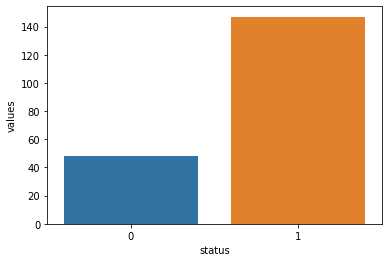

In [24]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
variable = parkinson_data["status"].value_counts()
variable_data = pd.DataFrame({'status':variable.index,'values':variable.values})
sns.barplot(x='status',y='values',data=variable_data)

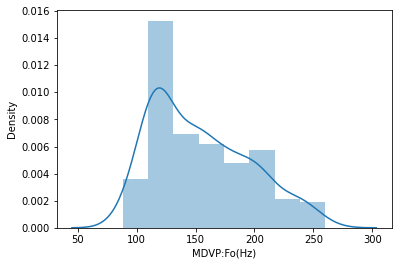

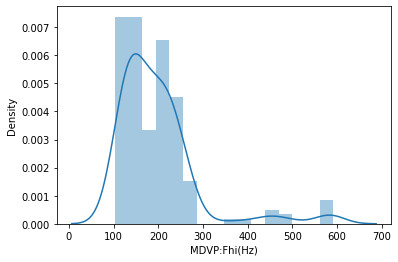

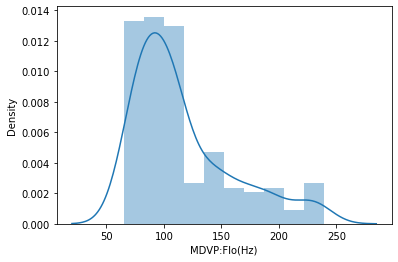

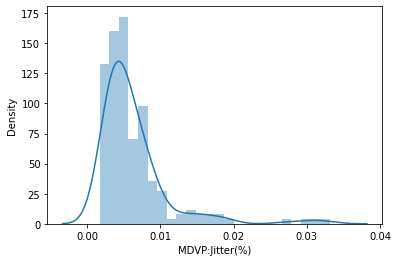

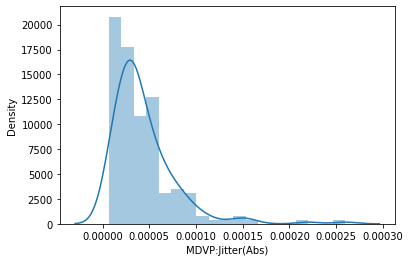

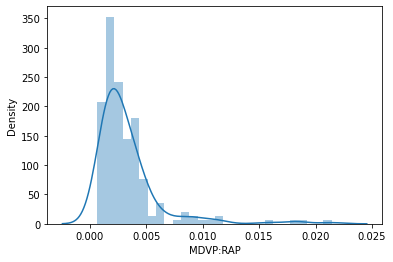

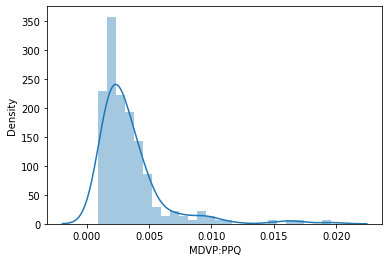

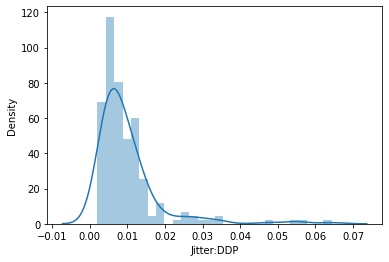

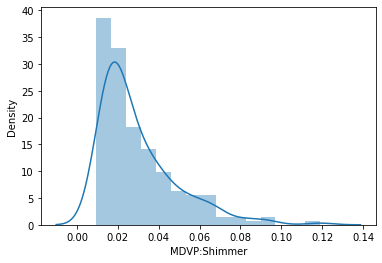

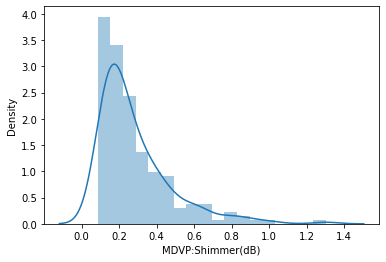

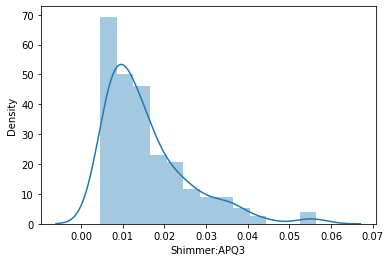

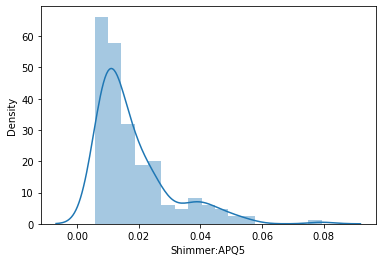

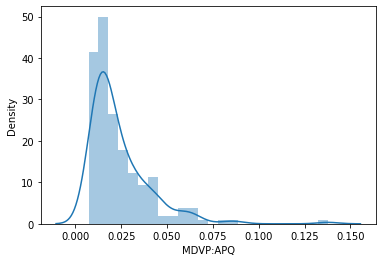

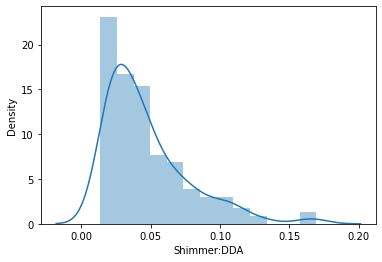

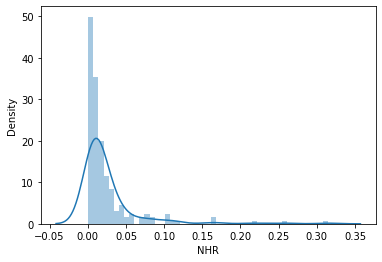

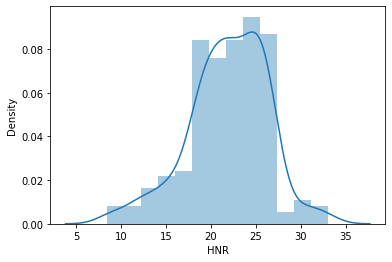

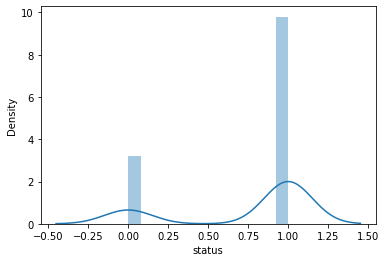

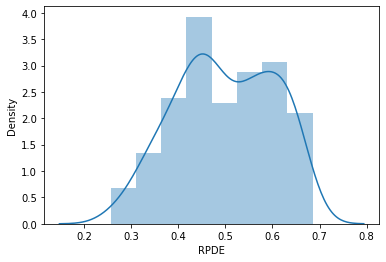

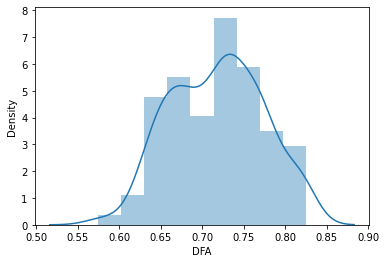

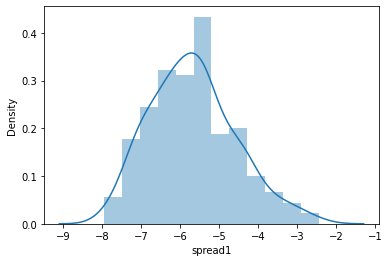

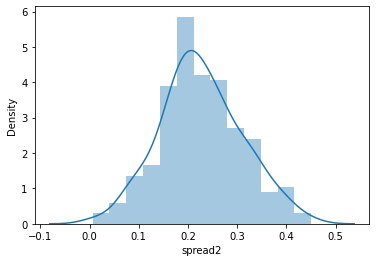

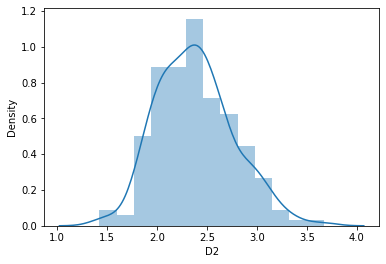

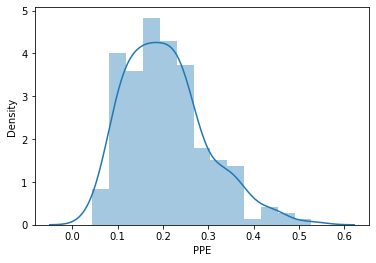

In [25]:
#Analyzing the distribution of the data using distplot
def distplots(col):
  sns.distplot(parkinson_data[col])
  plt.show()

for i in list(parkinson_data.columns)[1:]:
  distplots(i)

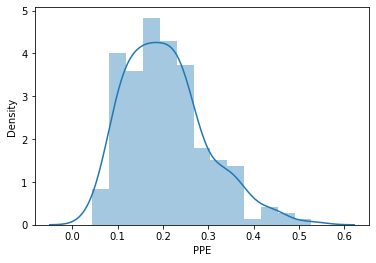

In [26]:
sns.distplot(parkinson_data["PPE"])

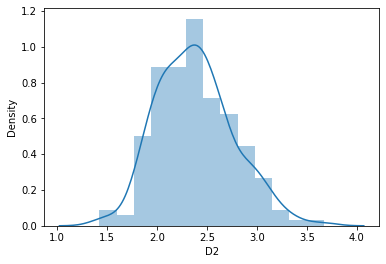

In [27]:
sns.distplot(parkinson_data['D2'])

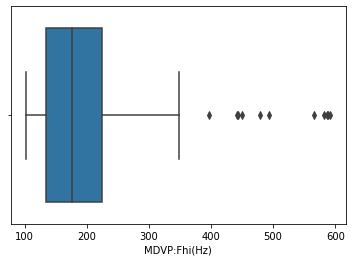

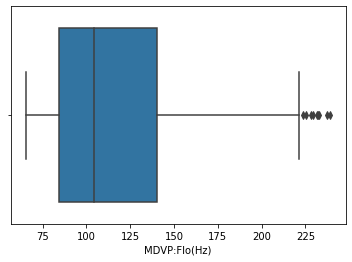

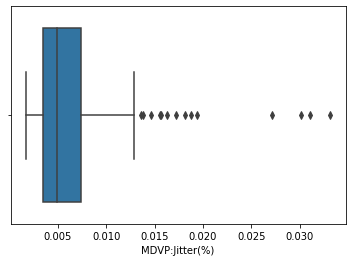

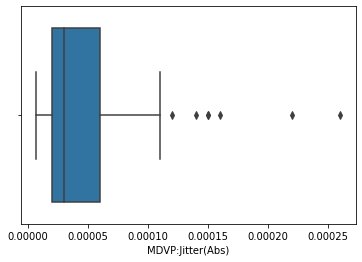

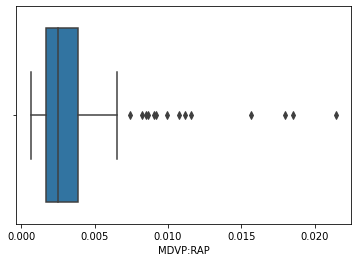

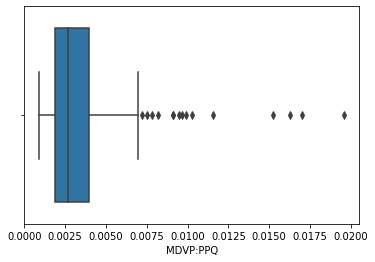

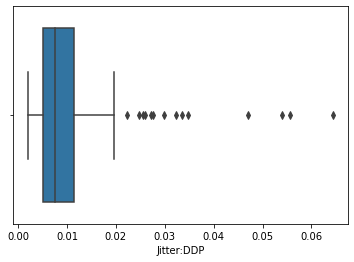

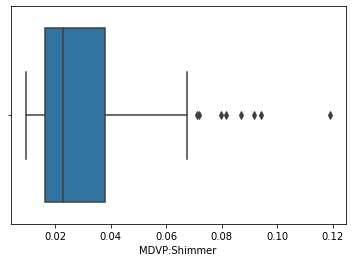

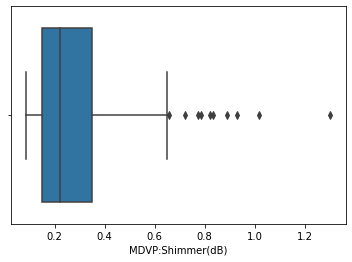

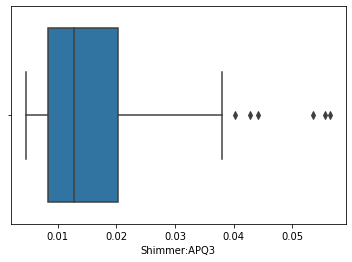

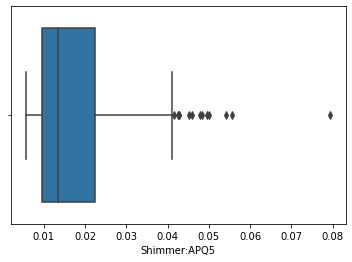

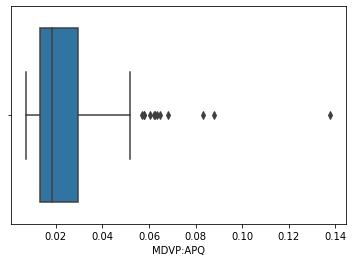

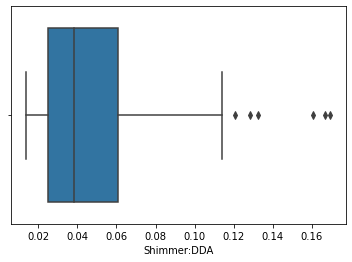

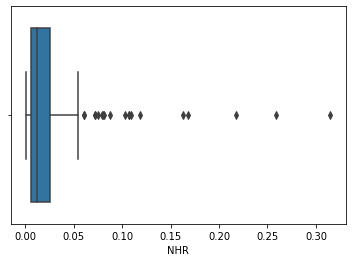

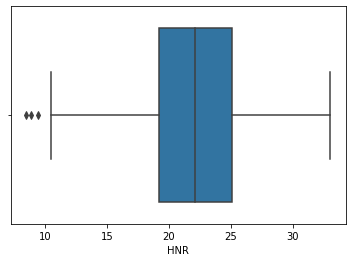

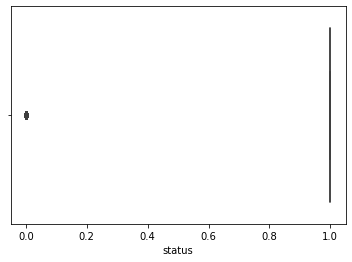

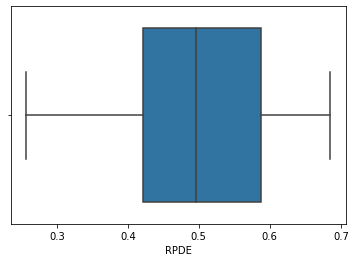

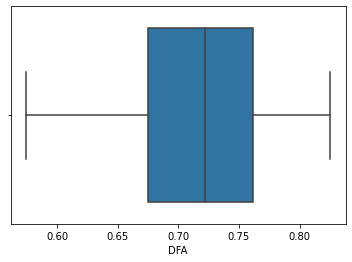

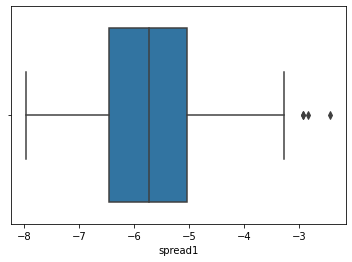

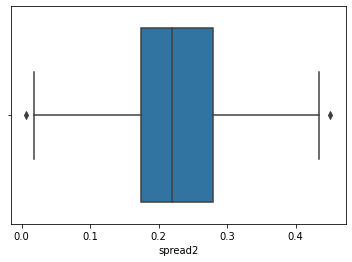

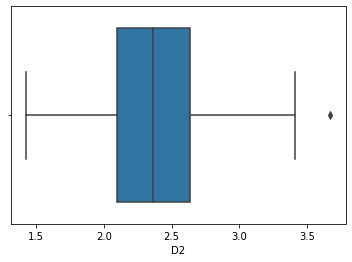

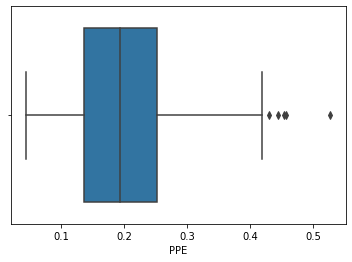

In [28]:
#Checking for outliers using boxplot from seabron framework across different quartiles
def boxplots(col):
  sns.boxplot(parkinson_data[col])
  plt.show()

for i in list(parkinson_data.select_dtypes(exclude=["object"]).columns)[1:]:
  boxplots(i)

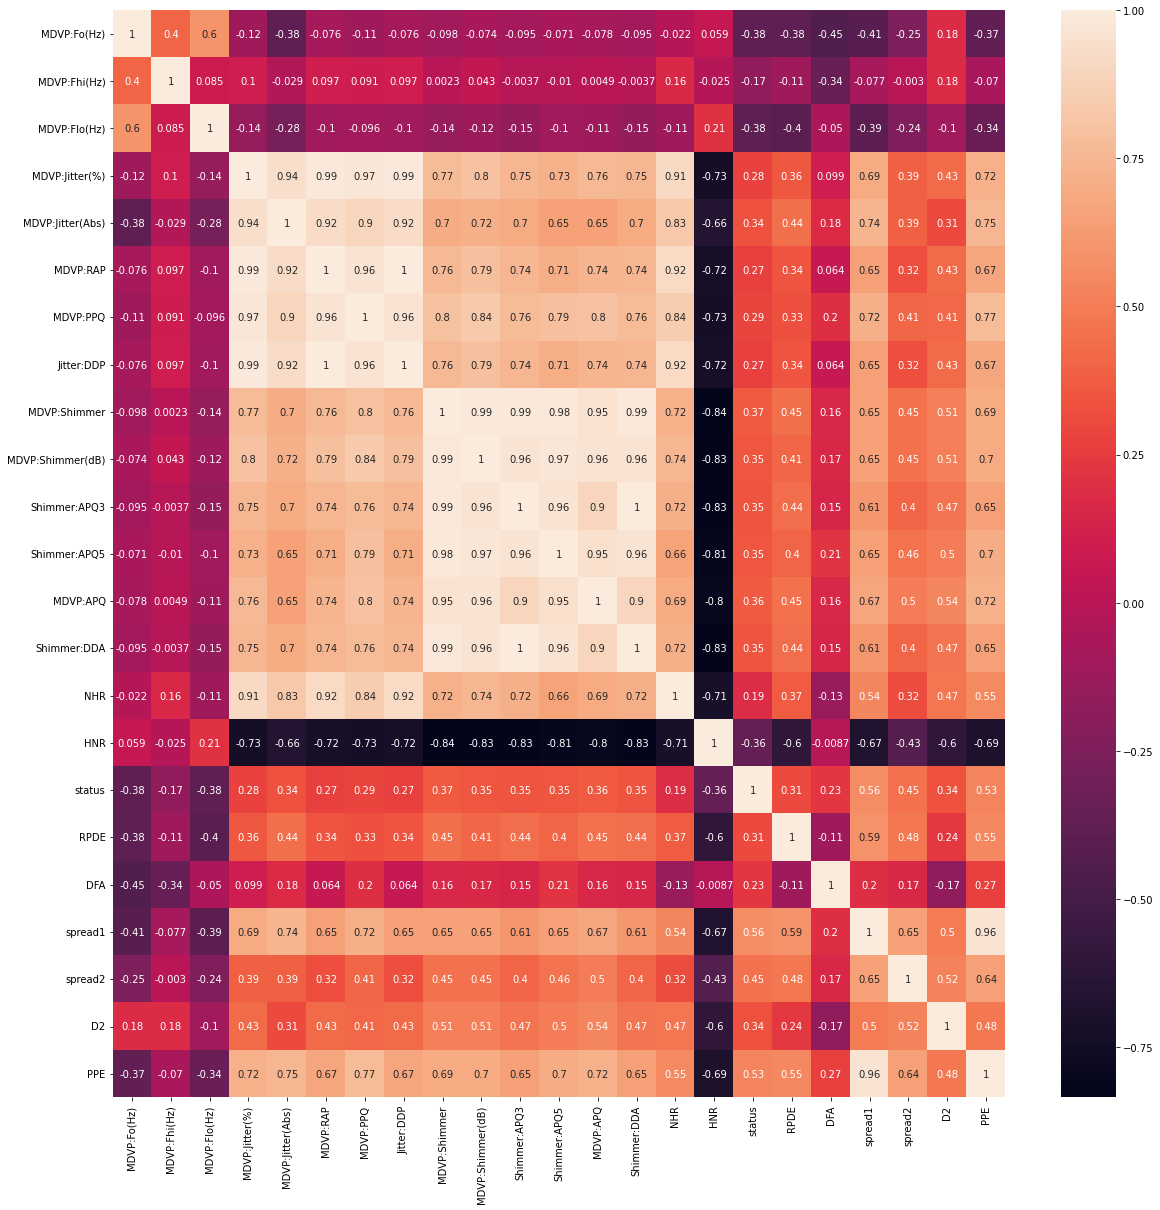

In [29]:
#Figuring out the correlations using heatmap to visualize between the features and patterns in the data used for this project

plt.figure(figsize=(20,20))
correlation_data=parkinson_data.corr()
sns.heatmap(correlation_data,annot=True)

From the above heatmap obtained, we can see the magnitude of a value in a color code ranging from minor to major intensity.As we can analyze from the above result that the color code is denoted from minimum to maximum intensity.

Maximum intensity denotes the decimal value of 1.00 (White) and Minimum intensity starts from -0.75 (Darkblue). The color determines the positive and negative relations using the data.


In [30]:
#We are making the final changes in the data by dividing the data into independent as x and dependent variables as y and removing the ID column
x = parkinson_data.drop(["status","name"],axis=1)
y = parkinson_data["status"]
#It is done to integrate the two x and y variables into the model building steps

In [31]:
#After the changes,let's detect the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter #For priortizing the importance to store elements as dictionary keys, and their counts as values.
print(Counter(y)) 

Counter({1: 147, 0: 48})


In [32]:
#Now,we are balancing the labels
ROS = RandomOverSampler() #To compensate the imbalance part present in the data
x_ROS,y_ROS = ROS.fit_resample(x, y)
print(Counter(y_ROS))

Counter({1: 147, 0: 147})


Scaling the data

In [33]:
#It is very much important to scale the data for the betterment of the model using such as Support Vector Machine and K Nearest Neighbor Algorithms
Scaler_data = MinMaxScaler((-1,1))
x = Scaler_data.fit_transform(x_ROS)
y = y_ROS

In [34]:
#Now, we are applying feature engineering and Principle Component Analysis using Data Mining for extracting high variance features and transforms
#Mining value from the data
#We are choosing the minimal number of variance as 0.95 as to target that the 95% of the variance is proved or confined from the mining process

from sklearn.decomposition import PCA
Princple_CA = PCA(.95)
X_PCA = Princple_CA.fit_transform(x)
print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


We have noticed that eight columns are needed to prove the 95 % of the data is retained

In [35]:
#Here the Parkinson_data is splitted into training and testing sets by maintaining 20% of the data sample for testing step
x_train,x_test,y_train,y_test = train_test_split(X_PCA,y, test_size=0.2, random_state=7)

Since the labels from the data has been balanced so we are to use metrics such as accuracy_score, confusion_matrix, f1_score, precision_score and recall_score 

Since we need to get boolean responses after the disease prediction so we are using Logistic Regression by the use of independent variables by assuming that the parkinson_data is linearably separable

## Model Building (Training and Testing)

### Data mining and performance metrics

In [36]:
#We are going to import and use it for assessing the model using performance metrics from Classification process
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
List_metrics = []
List_accuracy = []

#Logistic Regression
from sklearn.linear_model import LogisticRegression
Classification_model = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
Log_Regression = Classification_model.fit(x_train, y_train)
y_pred = Classification_model.predict(x_test)  #Prediction
Log_Regression_accuracy = accuracy_score(y_test, y_pred)  #Accuracy
print("The accuracy score with Logistic regression is:",Log_Regression_accuracy)

#Decision Tree Classificaton using supervised machine learning for classifiying the data with confident accuracy
from sklearn.tree import DecisionTreeClassifier
Classification_tree = DecisionTreeClassifier(random_state=14)
Decision_tree = Classification_tree.fit(x_train, y_train)
y_pred2 = Classification_tree.predict(x_test) #Prediction
Dec_tree_accuracy = accuracy_score(y_test, y_pred2) #Accuracy
print("The accuracy score with Decision Tree Classifier is:",Dec_tree_accuracy)

#Random Forest Classifier is used for its high dimensionality and accuracy capabilities, here information gain is priortized
from sklearn.ensemble import RandomForestClassifier
Classification_random = RandomForestClassifier(random_state=14)
RFE = Classification_random.fit(x_train, y_train)
y_pred3 = Classification_random.predict(x_test) #Prediction
Ran_For_accuracy = accuracy_score(y_test, y_pred3) #Accuracy
print("The accuracy score with Random Forest Classifier(Information gain) is:",Ran_For_accuracy)

#Random Forest Classifier with entropy condition
from sklearn.ensemble import RandomForestClassifier
Classification_entropy = RandomForestClassifier(criterion='entropy')
RFE = Classification_entropy.fit(x_train,y_train)
y_pred4 = Classification_entropy.predict(x_test)
Random = accuracy_score(y_test, y_pred4)
print("The accuracy score with Random Forest Classifier(Entropy) is:",Random)

#Using Support Vector Machine (SVM) for to enhance the similarity and to increase the scaling factor of the model
from sklearn.svm import SVC
Parkinson_model = SVC(cache_size=100)
Support_vector_machine = Parkinson_model.fit(x_train, y_train)
y_pred5 = Parkinson_model.predict(x_test)
Support_accuracy = accuracy_score(y_test, y_pred5)
print("The accuracy score with Support Vector Machine is:",Support_accuracy)

#K Nearest Neighbor Classifier for better effectiveness
from sklearn.neighbors import KNeighborsClassifier
KNN_parkinson = KNeighborsClassifier(n_neighbors=3)
K_Nearest_Neighbor_Classifier = KNN_parkinson.fit(x_train, y_train)
KNN_predict = KNN_parkinson.predict(x_test)
KNN_accuracy = accuracy_score(y_test, KNN_predict)
print("The accuracy score with K Nearest Neighbor Algorithm is:",KNN_accuracy)

#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
Model_NB = GNB.fit(x_train,y_train)
pred_gnb = Model_NB.predict(x_test)
GNB_accuracy = accuracy_score(y_test, pred_gnb)
print("The accuracy score with Gaussian Naive Bayes is:",GNB_accuracy)

print("\nLet's see the overall accuracy of the built model that is been created below, view the overall accuracy score below!")
Overall_accuracy_percentage = Log_Regression_accuracy+Dec_tree_accuracy+Ran_For_accuracy+Random+Support_accuracy+KNN_accuracy+GNB_accuracy
Average_accuracy = (Overall_accuracy_percentage)/7
print("The accuracy of all the combined metrics for the model is:",Average_accuracy/0.01)

The accuracy score with Logistic regression is: 0.8135593220338984
The accuracy score with Decision Tree Classifier is: 0.9491525423728814
The accuracy score with Random Forest Classifier(Information gain) is: 0.9830508474576272
The accuracy score with Random Forest Classifier(Entropy) is: 0.9661016949152542
The accuracy score with Support Vector Machine is: 0.9322033898305084
The accuracy score with K Nearest Neighbor Algorithm is: 0.9830508474576272
The accuracy score with Gaussian Naive Bayes is: 0.8813559322033898

Let's see the overall accuracy of the built model that is been created below, view the overall accuracy score below!
The accuracy of all the combined metrics for the model is: 92.97820823244552


####  Converging the above classification algorithms and performance metric using Voting Classifier.

In [37]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=[('Classification_model',Classification_model),('Classification_tree',Classification_tree),('Classification_random',Classification_random),('Classification_entropy',Classification_entropy),('Support_vector_machine',Support_vector_machine),('K_Nearest_Neighbor_Classifier',K_Nearest_Neighbor_Classifier),('Model_NB',Model_NB)],voting='hard',flatten_transform=True)
Model_VC = VC.fit(x_train, y_train)
Model_prediction = VC.predict(x_test)
Model_accuracy = accuracy_score(y_test,pred_gnb)
print(Model_accuracy)

0.8813559322033898


### XGBClassification - Supervised Machine Learning

In [38]:
Model_XG = XGBClassifier(random_state=0)
Model_XG.fit(x_train,y_train)

XGBClassifier()

## Assessing the model using metrics

In [39]:
y_predict = Model_XG.predict(x_test)
print(accuracy_score(y_test,y_predict)*100)

96.61016949152543


Hence by reducing the overfitting using XGBoost Classifier, we are getting accuracy_score of **98.30%** for the model

#### Confusion metrics

In [40]:
from sklearn.metrics import confusion_matrix
ypre = Classification_model.predict(x_test)
ypre = (ypre>0.5)
confusion_matrix(y_test,ypre) 

array([[20,  4],
       [ 7, 28]])

#### F1 score

In [41]:
from sklearn.metrics import f1_score
Variation_score = f1_score(y_test, Model_XG.predict(x_test), average='binary')
print(Variation_score/0.01)

97.14285714285714


#### Classification report

In [42]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("\n Classification report for Model  %s:\n%s\n" % (Model_XG, metrics.classification_report(y_test, y_pred)))


 Classification report for Model  XGBClassifier():
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.88      0.80      0.84        35

    accuracy                           0.81        59
   macro avg       0.81      0.82      0.81        59
weighted avg       0.82      0.81      0.81        59




In [43]:
final_data = parkinson_data.rename(columns = {'MDVP:Fo(Hz)':'Fo','MDVP:Fhi(Hz)':'Fhi','MDVP:Flo(Hz)':'Flo','MDVP:Shimmer(dB)':'Shimmer'})
final_data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Saving the model

In [44]:
import pickle

with open( 'Parkinson_MLmodel.sav', 'wb') as f:
    pickle.dump(Model_XG,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(Scaler_data,f)